# HW #7 Neural Networks

In this HW, we'll be exploring a visual proof of the universal approximation theorem and building (from scratch) a neural network that will approximate a pretty ridiculous function.

Head over to [this site](http://neuralnetworksanddeeplearning.com/chap4.html) and read from the beginning of the page until the "Many Input Variables" section. (You do not need to read the "Many Input Variables" section and beyond but are certainly welcome to do so!) You'll read the introduction, the "Two Caveats" section, and the "Universality with One Input and One Output" section.

Your answers to problems 1-5 should come from directly this reading.

**Problem 1**: Summarize the Universal Approximation Theorem. (Don't copy it; use your own words!)

Universal Approximation Theorem basically states that neural networks have a kind of universality. There is a neural network that can compute any continuous function, regardless what continuous function we want to compute.

**Problem 2**: Summarize the two caveats the author uses to describe the statement "a neural network can compute any function."

First, neural networks can only approximately compute a function, but it can approxmiate as good as we want by increasing number of hidden neurons. It is not exactly computing a function. 

Secondly, the neural networks can only approximate continuous functions. 

**Problem 3:** For a sigmoidal activation function to closely resemble a step function, how would you describe the value of $w$? What constraints exist on the value of $b$? How do we calculate $s$? What does the value of $s$ indicate?

Try playing around with the applets on [this site](http://neuralnetworksanddeeplearning.com/chap4.html) to test how different parts of the perceptron affect the output. This should be helpful in answering the questions above.

w is the weights assigned to neurons. The value of w should be very big, for example 999.

The constraints exist on the value of b is 0 to -w. 

The value of s is the step position, s=-b/w


**Problem 4**: When the author wants us to approximate $f(x)=0.2+0.4x^2+0.3x\sin(15x)+0.05\cos(50x)$ with a neural network, the function on the applet where we manipulate the values of $h_i$ is not $f(x)$. It's a different function. What is this function, and where on the feedforward Neural Network is can the vaule of this function be collected?

The function used to approximate f(x) is ∑j wjaj+b,  where w is the weight and controls the height, a is the neuron's activations, b is the bias.

We can control the values of the function by using s=-b/w
Step position is controlled with s and height is controlled with w. 

**Problem 5**: The author asks you to find values of $h_i$ that make your neural network closely approximate $\sigma^{-1}\circ f(x)$. Record your values of $h_i$ here and your best "average deviation" score. Let's name the $h$s from top to bottom on the graph as $h_1$, $h_2$ ,,,, $h_5$,

h1 = -1.2

h2 = -1.5

h3 = -0.4

h4 = -1.0

h5 = 0.8

The average deviation: 0.38 success

**Problem 6**: Build the neural network from your work in Problem 5 here with MLPClassifier.

A few things to keep in mind:
* How many inputs are there? 
* How many outputs are there?
* How many neurons are in the hidden layer?


In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from itertools import product
from scipy import optimize
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
%matplotlib inline

In [0]:
nn = MLPRegressor(
    hidden_layer_sizes=(10),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=0, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


There is 1 inpt, 1 output, 10 neurons are in the hidden layer

**Problem 7**: Once you've built the neural network with the structure described in Problem 6, use `np.linspace` to generate 1000 values of $x$ between 0 and 1 and estimate the performance of your neural network using mean squared error.

Recall that mean squared error(MSE) is given by:

$$
\frac{1}{n}\sum_{i=1}^n (\hat{y}-y)^2
$$


* Your $\hat{y}$ in this case are your predicted values from your neural network for each of the $x$ that you generated using `np.linspace`. Make sure to take into account the final activation function!
* Your $y$ values are the actual observed values of $f(x)=0.2+0.4x^2+0.3x\sin(15x)+0.05\cos(50x)$ for each of the $x$ that you generated using `np.linspace`.
* Use  [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) for this work.
* Plot  $f(x)$ curve overlapped with the curve predicted by your trained Neural Networks for x between 0 and 1
* Try different learning rates

In [0]:

X = np.linspace(0.0, 1,1000).reshape(-1, 1)

y = 0.2+0.4*X**2+0.3*X*np.sin(15*X)+0.05*np.cos(50*X)

y = y.ravel()

n = nn.fit(X, y)
pred_y=n.predict(X)

print ("MLPRegression Accuracy: {}".format(n.score(X, y)))

MLPRegression Accuracy: 0.5334249491462608


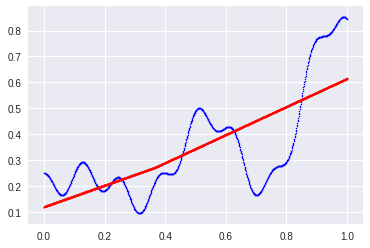

In [0]:
#test_x = np.arange(0.0, 1, 0.05).reshape(-1, 1)
#test_y = nn.predict(test_x)
fig = plt.figure()
ax1 = fig.add_subplot(111)

#ax1.set_ylim([0,1])
ax1.scatter(X, y, s=1, c='b', marker="s", label='real')
ax1.scatter(X,pred_y, s=2, c='r', marker="o", label='NN Prediction')
plt.show()


In [0]:
from sklearn.metrics import mean_squared_error
print('MSE =', mean_squared_error(y, pred_y))

MSE = 0.019137860444105263


###Different Learning rate

In [0]:
def train_mlp(units, activation='relu', sgd=False, lr=0.001, batch_size=200,loss_curve=False):
    
    mlp = MLPRegressor(hidden_layer_sizes=units, activation=activation)
    if sgd:
        mlp.set_params(solver='sgd', batch_size=batch_size, momentum=0.0, learning_rate_init=lr)
    
    mlp.fit(X, y)
    accuracy = mlp.score(X,y)
#     print(mlp.get_params())
    if loss_curve:
        return mlp.loss_curve_, accuracy
    
    return accuracy


def plot_hyper_param_plots(X, y, xlabel):
    best_x = X[np.argmax(y)]
    best_y = round(np.max(y), 2)
    plt.plot(X, y)
    plt.axvline(best_x, linestyle='dashed', color='red', 
                label= xlabel + ", {}, Test Accuracy: {}".format(best_x, best_y))
    plt.xlabel(xlabel)
    plt.ylabel('Test Accuracy')
    plt.legend()

In [0]:
learning_rates = np.linspace(0.001, 2, 12)
train_mlp_learning_rate = lambda lr: train_mlp((10,)*2, sgd=True, lr=lr, loss_curve=True)

In [0]:
lr_accs = map(train_mlp_learning_rate, learning_rates)

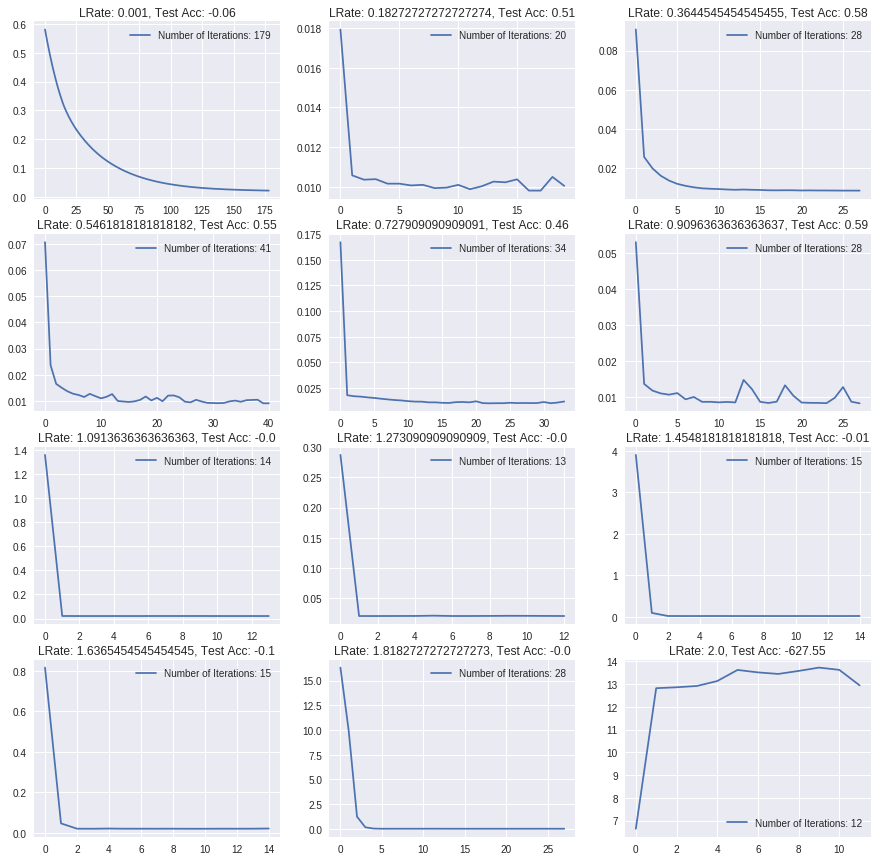

In [0]:
fig = plt.figure(figsize=(15, 15))
for idx, item in enumerate(zip(learning_rates, lr_accs)):
    learning_rate, loss_info = item
    loss_curve, acc = loss_info
    ax = fig.add_subplot(4, 3, idx+1)
    ax.plot(loss_curve, label='Number of Iterations: {}'.format(len(loss_curve)))
    ax.set_title("LRate: {}, Test Acc: {}".format(learning_rate, round(acc, 2)))
    ax.legend()

**Problem 8**: Suppose you wanted to increase the performance of this neural network. How might you go about doing so?
* You try different number of hidden layers and different number of neurons in each hidden layer.
* Report your best Neural Network structure and the minimum MSE you can get.

####Try different number of neurons in each hidden layer.

In [0]:
num_hidden_units = np.linspace(50, 1000, 20).astype('int')
all_test_accuracy = []
for units in num_hidden_units: 
    test_accuracy = train_mlp((units,))
    print ("Units: {}, Accuracy: {}".format(units, test_accuracy))
    all_test_accuracy.append(test_accuracy)

Units: 50, Accuracy: 0.4550668570695772
Units: 100, Accuracy: 0.5317667545461022
Units: 150, Accuracy: 0.5988894433202868
Units: 200, Accuracy: 0.59297104104805
Units: 250, Accuracy: 0.5490307767372282
Units: 300, Accuracy: 0.5469642353662871
Units: 350, Accuracy: 0.5554895910569464
Units: 400, Accuracy: 0.5653375164360386
Units: 450, Accuracy: 0.5771807971441723
Units: 500, Accuracy: 0.5729989195280509
Units: 550, Accuracy: 0.6206925507421197
Units: 600, Accuracy: 0.6229258150667583
Units: 650, Accuracy: 0.5780396095867694
Units: 700, Accuracy: 0.5597052000091846
Units: 750, Accuracy: 0.5646325223263171
Units: 800, Accuracy: 0.5997700064297217
Units: 850, Accuracy: 0.5916959801777695
Units: 900, Accuracy: 0.5726116838917252
Units: 950, Accuracy: 0.583149455996553
Units: 1000, Accuracy: 0.5893523452497931


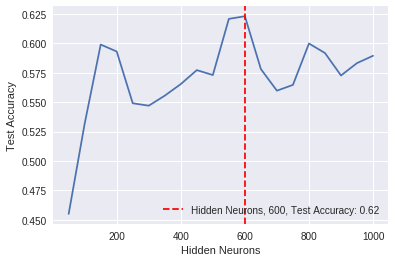

In [0]:
plot_hyper_param_plots(num_hidden_units, all_test_accuracy, 'Hidden Neurons')

###try different number of hidden layers

In [0]:
best_units = num_hidden_units[np.argmax(all_test_accuracy)]
best_depths = []

for depth in range(1, 11):
    accuracy = train_mlp((best_units,)*depth)
    best_depths.append(accuracy)
    print ("Depth of the Network: {}, Test Accuracy: {}".format(depth, accuracy))

Depth of the Network: 1, Test Accuracy: 0.5690551893699112
Depth of the Network: 2, Test Accuracy: 0.9338453850734296
Depth of the Network: 3, Test Accuracy: 0.952830545335874
Depth of the Network: 4, Test Accuracy: 0.9638485390950124
Depth of the Network: 5, Test Accuracy: 0.9284537322054537
Depth of the Network: 6, Test Accuracy: 0.9716677756581097
Depth of the Network: 7, Test Accuracy: 0.9454814158725443
Depth of the Network: 8, Test Accuracy: 0.9826192384098675
Depth of the Network: 9, Test Accuracy: 0.9795735712311006
Depth of the Network: 10, Test Accuracy: 0.9797570923743115


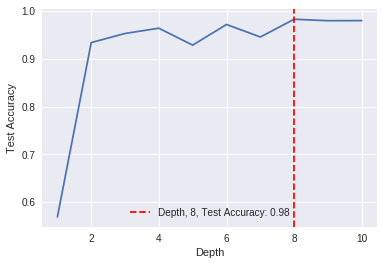

In [0]:
plot_hyper_param_plots(range(1, 11), best_depths, "Depth")

###Report your best Neural Network structure and the minimum MSE you can get.

In [0]:
X = np.linspace(0.0, 1, 1000).reshape(-1, 1)
#x = np.arange(0.0, 1, 0.001).reshape(-1, 1)
y = 0.2+0.4*X**2+0.3*X*np.sin(15*X)+0.05*np.cos(50*X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

nn = MLPRegressor(
    hidden_layer_sizes=(600, 600, 600, 600, 600, 600, 600, 600),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=0, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

n = nn.fit(X, y)
pred_y=n.predict(X)

print ("MLPRegression Accuracy: {}".format(n.score(X, y)))



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegression Accuracy: 0.9721558753482397


In [0]:
from sklearn.metrics import mean_squared_error
print('MSE =', mean_squared_error(y, pred_y))

MSE = 0.0011421034425192688
